# Credit Risk Modelling - Loan Classification
### This model helps us to classify loan applicants based on their likelihood of loan repayment.

### This model is trained using RanfomForest Classifier Algorithm
- Training Accuracy: 99%
- Test Accuracy: 96%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_detection.csv')
data.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# EDA

In [3]:
data.shape

(41188, 60)

In [4]:
data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [6]:
data.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing Data

In [7]:
for i in data.isna().sum():
    if i != 0:
        print(i)

### No missing data found

## Duplicate Data

In [8]:
data[data.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


### No need to drop duplicates because that can affect the model evaluation.

## Outliers Detection

In [9]:
data.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [10]:
data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

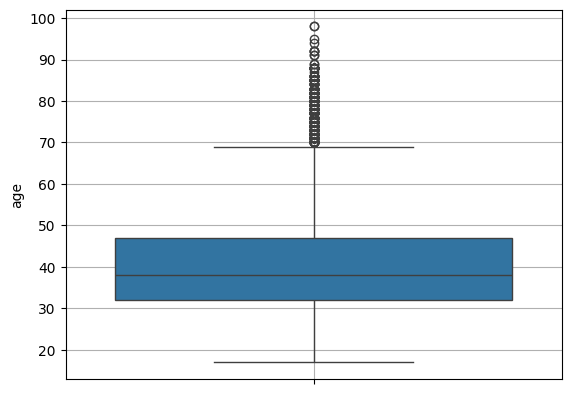

In [11]:
sns.boxplot(data['age'])
plt.grid()
plt.show()

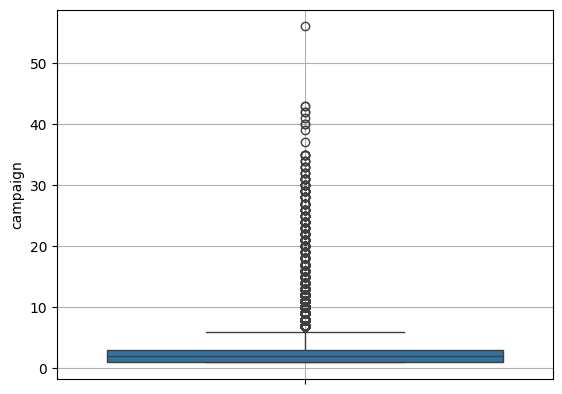

In [12]:
sns.boxplot(data['campaign'])
plt.grid()
plt.show()

In [13]:
# For age column
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
data = data[~((data['age'] < lower_bound) | (data['age'] > upper_bound))]

In [14]:
# For campaign column
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
data = data[~((data['campaign'] < lower_bound) | (data['campaign'] > upper_bound))]

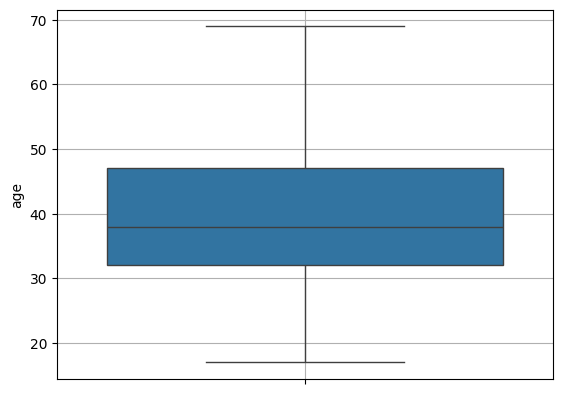

In [15]:
sns.boxplot(data['age'])
plt.grid()
plt.show()

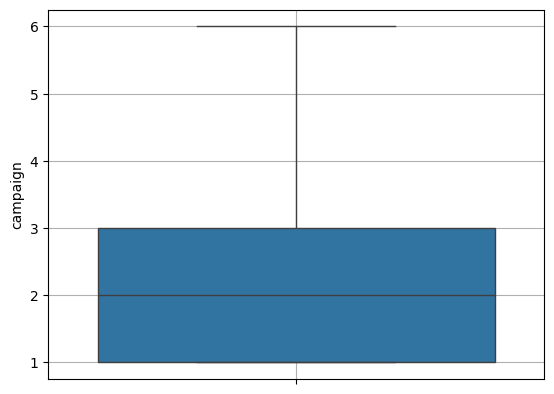

In [16]:
sns.boxplot(data['campaign'])
plt.grid()
plt.show()

In [17]:
data.shape

(38327, 60)

## Feature Selection

In [18]:
data.corr()['Loan_Status_label']

age                             -0.019475
campaign                        -0.045315
pdays                           -0.322997
previous                         0.224476
no_previous_contact             -0.322961
not_working                      0.094724
job_admin.                       0.040050
job_blue-collar                 -0.071266
job_entrepreneur                -0.014960
job_housemaid                   -0.007511
job_management                   0.000938
job_retired                      0.044469
job_self-employed               -0.001789
job_services                    -0.029125
job_student                      0.100696
job_technician                  -0.000333
job_unemployed                   0.018536
job_unknown                     -0.003315
marital_divorced                -0.018906
marital_married                 -0.048976
marital_single                   0.065424
marital_unknown                  0.007976
education_basic.4y              -0.032043
education_basic.6y              -0

## Checking for Imbalance of Data

In [19]:
data.Loan_Status_label

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: Loan_Status_label, Length: 38327, dtype: int64

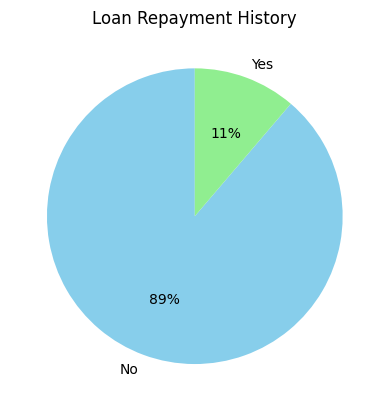

In [20]:
plt.pie(data.Loan_Status_label.value_counts(), labels=data.Loan_Status_label.value_counts().rename(index={0:'No', 1:'Yes'}).index, autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Loan Repayment History')
plt.show()

### Fixing Imbalanced Data with Oversampling

In [21]:
x = data.iloc[:, :-1]
y = data['Loan_Status_label']
Over = RandomOverSampler(random_state=42)
x_over, y_over = Over.fit_resample(x, y)

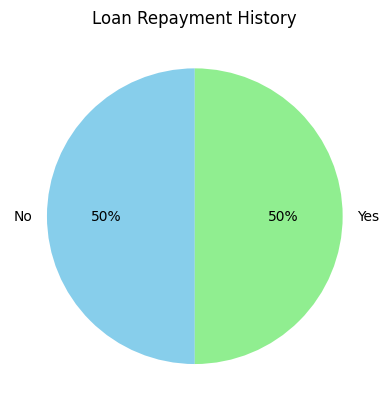

In [22]:
plt.pie(y_over.value_counts(), labels=y_over.value_counts().rename(index={0:'No', 1:'Yes'}).index, autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Loan Repayment History')
plt.show()

# Model Building

### Train/Test Split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=42)

### Feature Scalling

In [24]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# Model Selection

### Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [26]:
print("Training Score:", round(lr.score(x_train_sc, y_train), 2)*100, "%")
print("Test Score:", round(lr.score(x_test_sc, y_test), 2)*100, "%")

Training Score: 69.0 %
Test Score: 70.0 %


### KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_sc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
print("Training Score:", round(knn.score(x_train_sc, y_train), 2)*100, "%")
print("Test Score:", round(knn.score(x_test_sc, y_test), 2)*100, "%")

  File "C:\Users\JAIVAL CHAUHAN\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Progr

Training Score: 87.0 %
Test Score: 84.0 %


### Decision Tree

In [29]:
dt = DecisionTreeClassifier(max_depth=38)
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier(max_depth=38)

In [30]:
print("Training Score:", round(dt.score(x_train_sc, y_train), 2)*100, "%")
print("Test Score:", round(dt.score(x_test_sc, y_test), 2)*100, "%")

Training Score: 99.0 %
Test Score: 94.0 %


### Random Forest

In [31]:
rf = RandomForestClassifier(max_samples=0.75, random_state=42, max_depth=25)
rf.fit(x_train_sc, y_train)

RandomForestClassifier(max_depth=25, max_samples=0.75, random_state=42)

In [32]:
print("Training Score:", round(rf.score(x_train_sc, y_train), 2)*100, "%")
print("Test Score:", round(rf.score(x_test_sc, y_test), 2)*100, "%")

Training Score: 99.0 %
Test Score: 96.0 %


### Adaboost

In [33]:
ab = AdaBoostClassifier(n_estimators=100, random_state=42, estimator=RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42))
ab.fit(x_train_sc, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=4,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

In [34]:
print("Training Score:", round(ab.score(x_train_sc, y_train), 2)*100, "%")
print("Test Score:", round(ab.score(x_test_sc, y_test), 2)*100, "%")

Training Score: 78.0 %
Test Score: 76.0 %


### Gradient Boost

In [35]:
gb = GradientBoostingClassifier(max_depth=6, learning_rate=0.1, n_estimators=100)
gb.fit(x_train_sc, y_train)

GradientBoostingClassifier(max_depth=6)

In [36]:
print("Training Score:", round(gb.score(x_train_sc, y_train), 2)*100, "%")
print("Test Score:", round(gb.score(x_test_sc, y_test), 2)*100, "%")

Training Score: 76.0 %
Test Score: 75.0 %


# Model Training - Random Forest

In [37]:
model = RandomForestClassifier(max_samples=0.75, random_state=42, max_depth=25)
model.fit(x_train_sc, y_train)

RandomForestClassifier(max_depth=25, max_samples=0.75, random_state=42)

## Model Prediction

In [38]:
y_train_pred = model.predict(x_train_sc)
y_test_pred = model.predict(x_test_sc)

## Model Evaluation

### Training Data

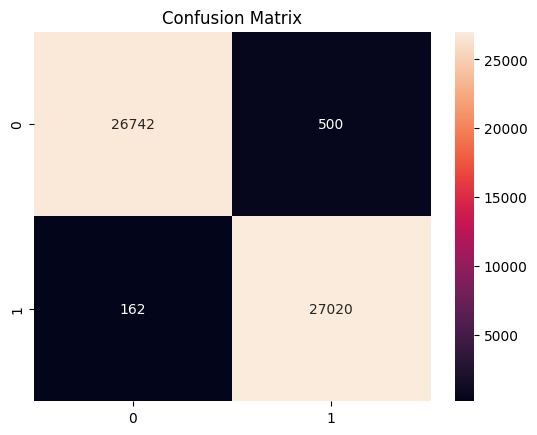

In [39]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.5g')
plt.title("Confusion Matrix")
plt.show()

In [40]:
accuracy_score(y_train, y_train_pred)

0.9878362487138027

In [41]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     27242
           1       0.98      0.99      0.99     27182

    accuracy                           0.99     54424
   macro avg       0.99      0.99      0.99     54424
weighted avg       0.99      0.99      0.99     54424



### Test Data

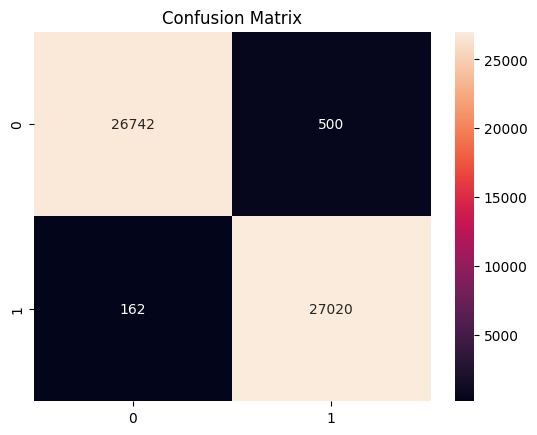

In [42]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.5g')
plt.title("Confusion Matrix")
plt.show()

In [43]:
accuracy_score(y_test, y_test_pred)

0.9558283110392474

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6773
           1       0.93      0.99      0.96      6833

    accuracy                           0.96     13606
   macro avg       0.96      0.96      0.96     13606
weighted avg       0.96      0.96      0.96     13606

